In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [2]:
import zipfile
import os

zip_path = '/content/archive (4).zip'
extract_path = '/content/extracted_data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the contents of the extracted directory
os.listdir(extract_path)


['malignant', 'benign']

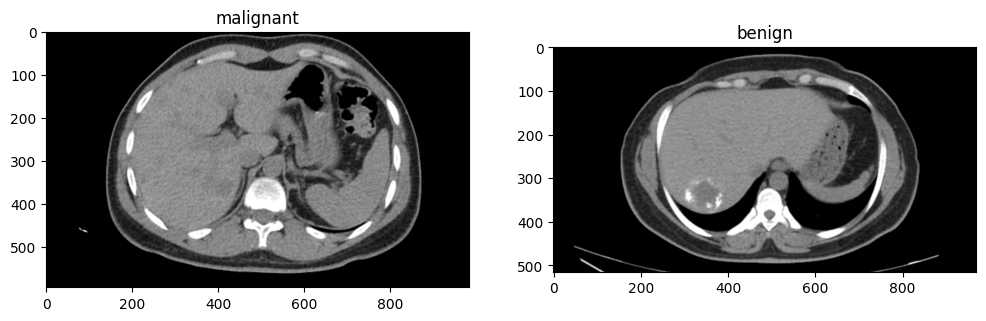

In [3]:
import matplotlib.pyplot as plt
import cv2

# Define the categories
categories = ['malignant', 'benign']

# Plot sample images
plt.figure(figsize=(12, 8))

for category in categories:
    category_path = os.path.join(extract_path, category)
    sample_image = cv2.imread(os.path.join(category_path, os.listdir(category_path)[0]))

    plt.subplot(1, 2, categories.index(category) + 1)
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title(category)

plt.show()


In [8]:
import os

benign_images = os.listdir("/content/extracted_data/benign")
malignant_images = os.listdir("/content/extracted_data/malignant")

print("Number of Benign Images:", len(benign_images))
print("Number of Malignant Images:", len(malignant_images))


Number of Benign Images: 102
Number of Malignant Images: 34


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data generators
batch_size = 16
image_size = (128, 128)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' since  have two classes
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    extract_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 110 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
7/7 [==============================] - 4s 325ms/step - loss: 0.6425 - accuracy: 0.6727 - val_loss: 0.5376 - val_accuracy: 0.7692
Epoch 2/5
7/7 [==============================] - 1s 195ms/step - loss: 0.5685 - accuracy: 0.7545 - val_loss: 0.5435 - val_accuracy: 0.7692
Epoch 3/5
7/7 [==============================] - 1s 189ms/step - loss: 0.5068 - accuracy: 0.7636 - val_loss: 0.4064 - val_accuracy: 0.7692
Epoch 4/5
7/7 [==============================] - 1s 190ms/step - loss: 0.3520 - accuracy: 0.8727 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 1s 186ms/step - loss: 0.1968 - accuracy: 0.9273 - val_loss: 0.0592 - val_accuracy: 1.0000


In [26]:
# Print the training and validation accuracy
train_accuracy = history.history['accuracy'][-1]


print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.9273


1/1 [==============================] - 0s 300ms/step


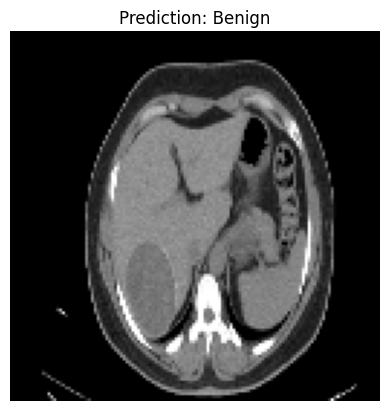

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
uploaded_image_path = '/content/6.PNG'  # Adjust the file name
img = image.load_img(uploaded_image_path, target_size=(128, 128))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale the pixel values to the range [0, 1]

# Make predictions
predictions = model.predict(img_array)

# Plot the image
plt.imshow(img)
plt.title(f"Prediction: {'Malignant' if predictions[0] > 0.5 else 'Benign'}")
plt.axis('off')
plt.show()
